# Multiple Linear Regression Assignment - Prediction of car prices
## Automobile company - Geely Auto
### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Data Understanding - Reading Data

In [1]:
# Import Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Import Train test split and MinMax Scaler from Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression from Scikit learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Import statsmodels to add constant
import statsmodels.api as sm
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Linear Regression and RFE from Scikit learn feature selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
# Create Master Data Frame and Read the data
CarPrice=pd.read_csv("CarPrice_Assignment.csv")
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Findind Number of Rows and Column (Rows,Columns)
CarPrice.shape

(205, 26)

In [4]:
# Checking Info and Missing Values
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
#Checking Percentage of missing values in each column sorted descending order
print(round((CarPrice.isnull().sum() * 100/ len(CarPrice)),1).sort_values(ascending=False))

price               0.0
highwaympg          0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
car_ID              0.0
dtype: float64


### Summary:
* There is no missing Values in the CarPrice Dataframe

In [6]:
### Statistical Summary of the numerical variable in data frame
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
CarPrice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Summary:
* There are 14 numerical variables and 11 Categorical in the dataframe

    #### Numeric Variables
    * wheelbase		 - Weelbase of car (Numeric)		
    * carlength		 - Length of car (Numeric)		
    * carwidth		 - Width of car (Numeric)		
    * carheight		 - height of car (Numeric)		
    * curbweight		 - The weight of a car without occupants or baggage. (Numeric)	
    * boreratio		 - Boreratio of car (Numeric)		
    * stroke			 - Stroke or volume inside the engine (Numeric)		
    * compressionratio - compression ratio of car (Numeric)		
    * horsepower		 - Horsepower (Numeric)		
    * peakrpm			 - car peak rpm (Numeric)		
    * citympg			 - Mileage in city (Numeric)		
    * highwaympg		 - Mileage on highway (Numeric)		
    * price(Dependent variable) - Price of car (Numeric)	
    * enginesize		 - Size of car (Numeric)	        

    #### Categorical Variables

    * Symboling 		 - Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
    * carCompany		 - Name of car company (Categorical)		
    * fueltype		 - Car fuel type i.e gas or diesel (Categorical)		
    * aspiration		 - Aspiration used in a car (Categorical)		
    * doornumber		 - Number of doors in a car (Categorical)		
    * carbody			 - body of car (Categorical)		
    * drivewheel		 - type of drive wheel (Categorical)		
    * enginelocation	 - Location of car engine (Categorical)		      	
    * enginetype		 - Type of engine. (Categorical)		
    * cylindernumber	 - cylinder placed in the car (Categorical)		
    * fuelsystem		 - Fuel system of car (Categorical)		

### Data Preparation

* There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. 
* For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. 
* Here We are considering only company name as the independent variable for model building. 

In [8]:
# Splitting 'CarName' Variable using space and created new variable called 'CarCompany'
CarCompany=CarPrice['CarName'].apply(lambda a : a.split(' ')[0])

In [9]:
# Inserting New Variable 'CarCompany' in to data frame 1st Column
CarPrice.insert(0,"CarCompany",CarCompany)

In [10]:
# Checking Dataframes - head() returns the first 5 rows
CarPrice.head()

,CarCompany,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Lets check the list of unique company names in the data frame
CarPrice.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Summary
There are 28 unique companies in the data frame. But observed Case Sensitive,spelling mistakes in the car name due to that few duplicates companies are found.

       'alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'


### Dealing with  Duplicated Spelling mistakes car companies. Below are the list
* maxda - mazda
* Nissan - nissan
* porsche - porcshce
* toyota - toyouta
* vokswagen - volkswagen - vw

In [12]:
# Using Replace function replacing the correct values
CarPrice.CarCompany.replace('maxda','mazda',inplace=True)
CarPrice.CarCompany.replace('Nissan','nissan',inplace=True)
CarPrice.CarCompany.replace('porcshce','porsche',inplace=True)
CarPrice.CarCompany.replace('toyouta','toyota',inplace=True)
CarPrice.CarCompany.replace('vokswagen','volkswagen',inplace=True)
CarPrice.CarCompany.replace('vw','volkswagen',inplace=True)

In [13]:
# list of unique company names in the data frame
CarPrice.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Summary
After correcting the car company names. There are 22 unique companies in the data frame.

       'alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyouta', 'volkswagen', 'volvo'

## Exploratory Data Analysis - Univariate and Bivariate Analysis:

### Visualising Categorical Variables

Text(0.5, 1.0, 'Top Used Car Companies')

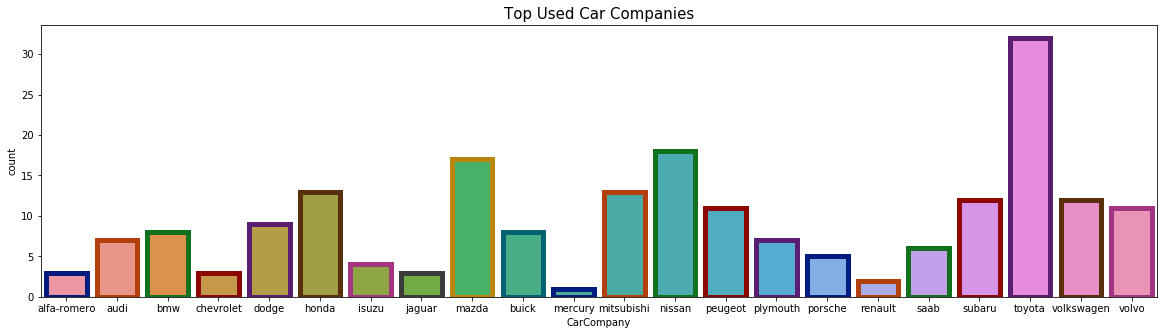

In [14]:
fig = plt.figure(figsize=(20, 5))
sns.countplot(x='CarCompany',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used Car Companies', fontsize=15)


### Summary
In the American market Toyota is the top most used company. Second and Third most are Nissan and Mazda

### Visualising other Categorical Variables

Text(0.5, 1.0, 'Top Used enginelocation')

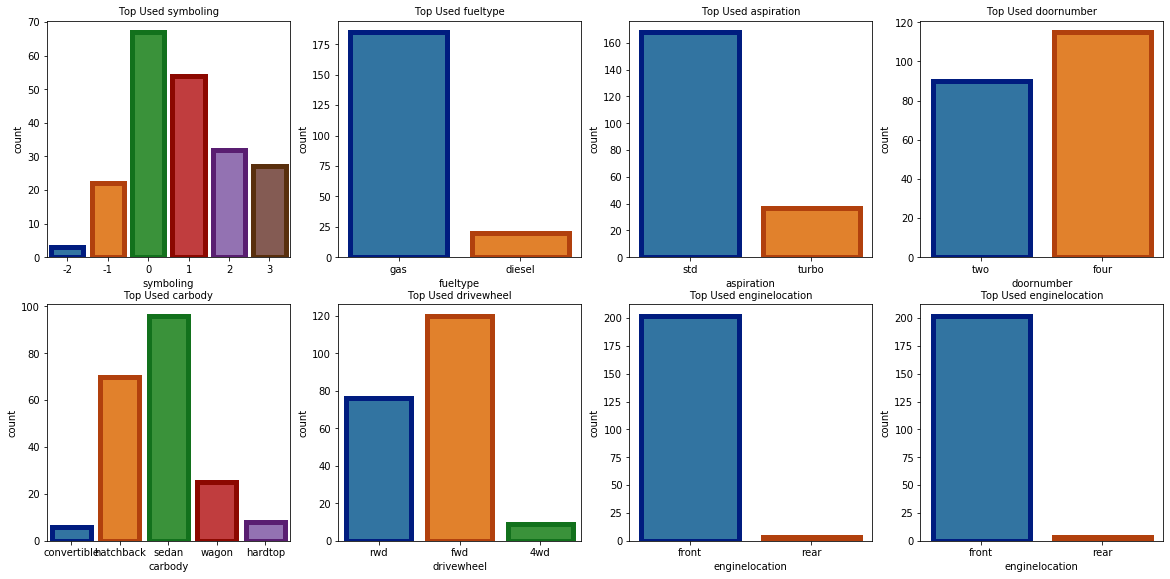

In [15]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(441)
sns.countplot(x='symboling',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used symboling', fontsize=10)
ax = fig.add_subplot(442)
sns.countplot(x='fueltype',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used fueltype', fontsize=10)
ax = fig.add_subplot(443)
sns.countplot(x='aspiration',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used aspiration', fontsize=10)
ax = fig.add_subplot(444)
sns.countplot(x='doornumber',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used doornumber', fontsize=10)
ax = fig.add_subplot(445)
sns.countplot(x='carbody',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used carbody', fontsize=10)
ax = fig.add_subplot(446)
sns.countplot(x='drivewheel',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used drivewheel', fontsize=10)
ax = fig.add_subplot(447)
sns.countplot(x='enginelocation',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used enginelocation', fontsize=10)
ax = fig.add_subplot(448)
sns.countplot(x='enginelocation',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used enginelocation', fontsize=10)

Text(0.5, 1.0, 'Top Used fuelsystem')

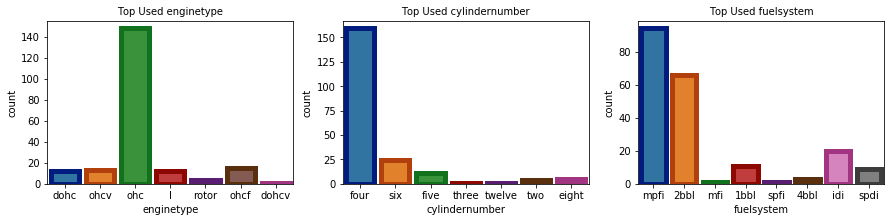

In [16]:
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(131)
sns.countplot(x='enginetype',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used enginetype', fontsize=10)
ax = fig.add_subplot(132)
sns.countplot(x='cylindernumber',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used cylindernumber', fontsize=10)
ax = fig.add_subplot(133)
sns.countplot(x='fuelsystem',data=CarPrice,linewidth=5,edgecolor=sns.color_palette("dark", 15))
plt.title('Top Used fuelsystem', fontsize=10)

### Analysis Summary
In the American market,
* Gas Fuel is preferred than Diesel
* std is the most aspiration used in the car than turbo
* Four door cars are preferred than 2
* Sedan car body is preffered than others
* fwd drive feel,front engine locations are preferred than others
* ohc engined type is most preferred
* mpfi fuel system is preferred than others

### Visualising the relasionship between categorical variables vs numeric variables
#### Categorical Variable Vs Numeric Variable (Target Variable - 'price' Column)
* price - Price of the car is the car is the dependent variable. Lets compare price(numeric variable) with other categorical variable
Y Axis - Price (Target Variable)
X Axis - Categorical Variables

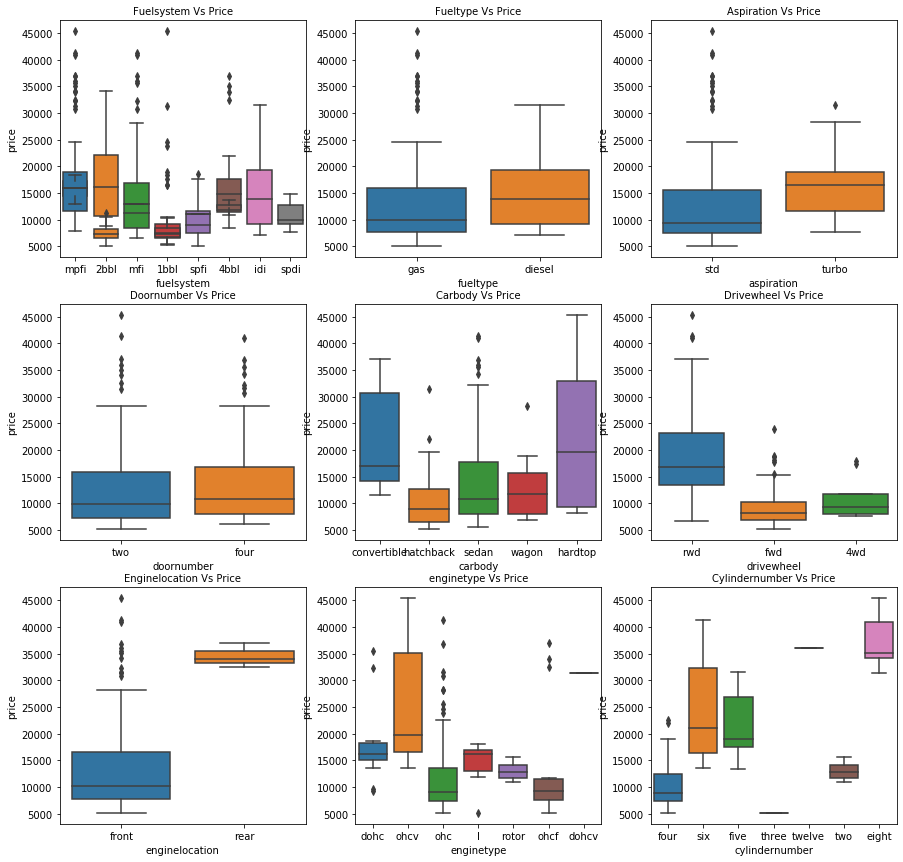

In [17]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice)
plt.title('Symboling Vs Price', fontsize=10)
plt.subplot(432)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.title('Fueltype Vs Price', fontsize=10)
plt.subplot(433)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.title('Aspiration Vs Price', fontsize=10)
plt.subplot(434)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.title('Doornumber Vs Price', fontsize=10)
plt.subplot(435)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.title('Carbody Vs Price', fontsize=10)
plt.subplot(436)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.title('Drivewheel Vs Price', fontsize=10)
plt.subplot(437)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.title('Enginelocation Vs Price', fontsize=10)
plt.subplot(438)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.title('enginetype Vs Price', fontsize=10)
plt.subplot(439)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.title('Cylindernumber Vs Price', fontsize=10)
plt.subplot(431)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.title('Fuelsystem Vs Price', fontsize=10)
plt.show()

### Summary
* Fuel Type 'Diesel' have higher price than fuel
* Aspiration 'Turbo' have higher price than std
* It is not like clear difference in the doornumber prices. But there is slightly little sort of higher prices for the cars that have four doors.
* Carbody 'hardtop' and 'Convertible' having higher price than Sedan
* Price is significantly higher for rwd drive wheel than fwd and 4wd
* There is significantly higher price for rear end engine location than front end. There is significantly difference between cars having front engine location and those cars dont.

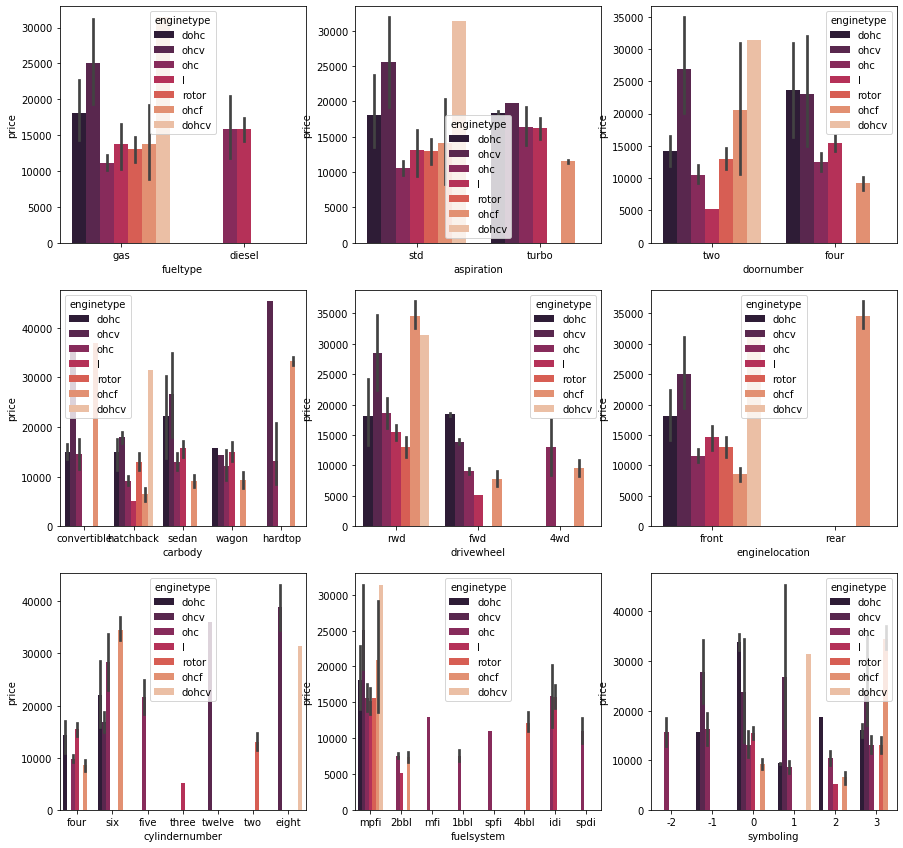

In [18]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.barplot(x='fueltype',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(432)
sns.barplot(x='aspiration',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(433)
sns.barplot(x='doornumber',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(434)
sns.barplot(x='carbody',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(435)
sns.barplot(x='drivewheel',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(436)
sns.barplot(x='enginelocation',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(437)
sns.barplot(x='cylindernumber',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(438)
sns.barplot(x='fuelsystem',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.subplot(439)
sns.barplot(x='symboling',y="price",hue='enginetype',data=CarPrice,palette="rocket")
plt.show()

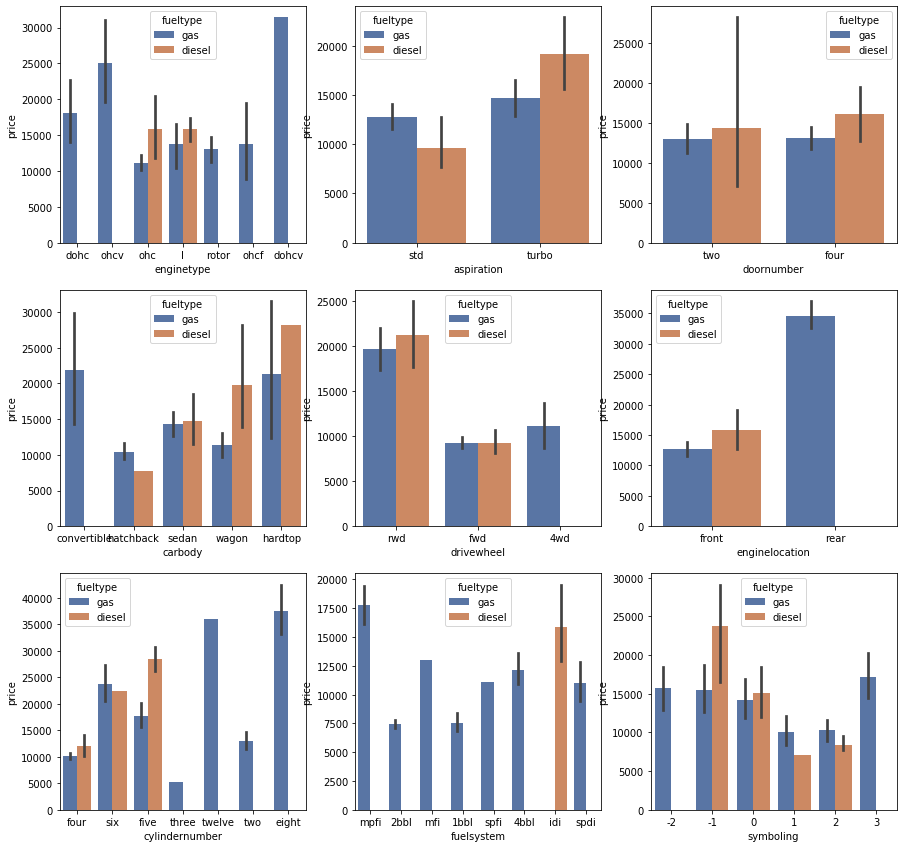

In [19]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.barplot(x='enginetype',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(432)
sns.barplot(x='aspiration',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(433)
sns.barplot(x='doornumber',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(434)
sns.barplot(x='carbody',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(435)
sns.barplot(x='drivewheel',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(436)
sns.barplot(x='enginelocation',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(437)
sns.barplot(x='cylindernumber',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(438)
sns.barplot(x='fuelsystem',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.subplot(439)
sns.barplot(x='symboling',y="price",hue='fueltype',data=CarPrice,palette="deep")
plt.show()

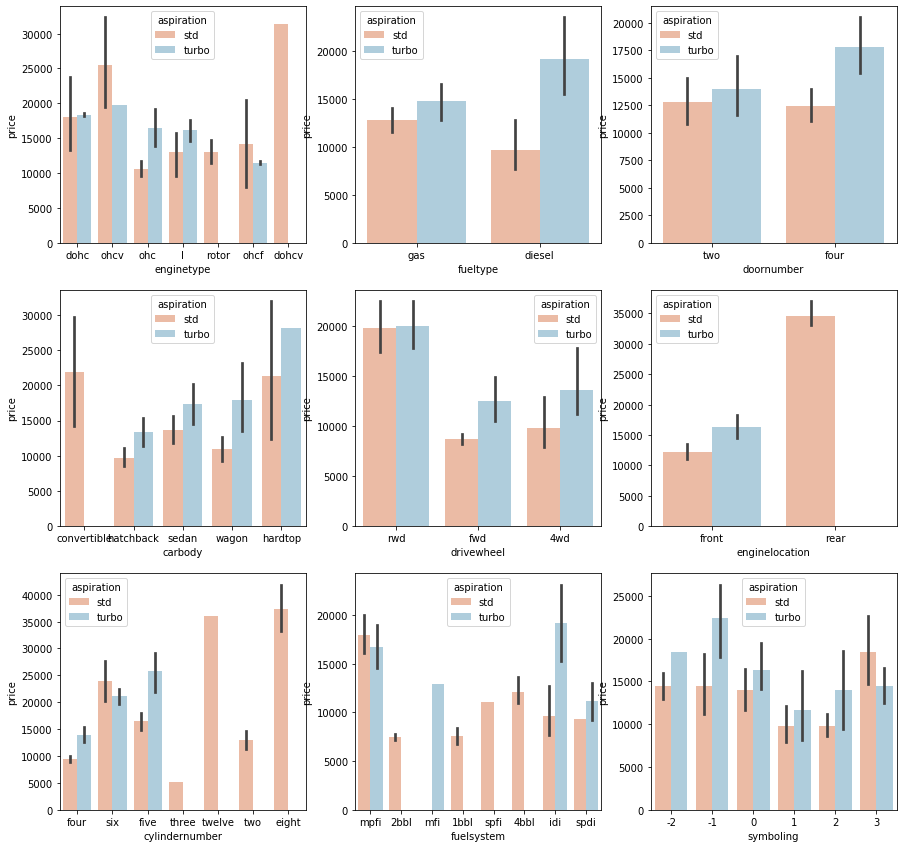

In [20]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.barplot(x='enginetype',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(432)
sns.barplot(x='fueltype',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(433)
sns.barplot(x='doornumber',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(434)
sns.barplot(x='carbody',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(435)
sns.barplot(x='drivewheel',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(436)
sns.barplot(x='enginelocation',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(437)
sns.barplot(x='cylindernumber',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(438)
sns.barplot(x='fuelsystem',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.subplot(439)
sns.barplot(x='symboling',y="price",hue='aspiration',data=CarPrice,palette="RdBu")
plt.show()

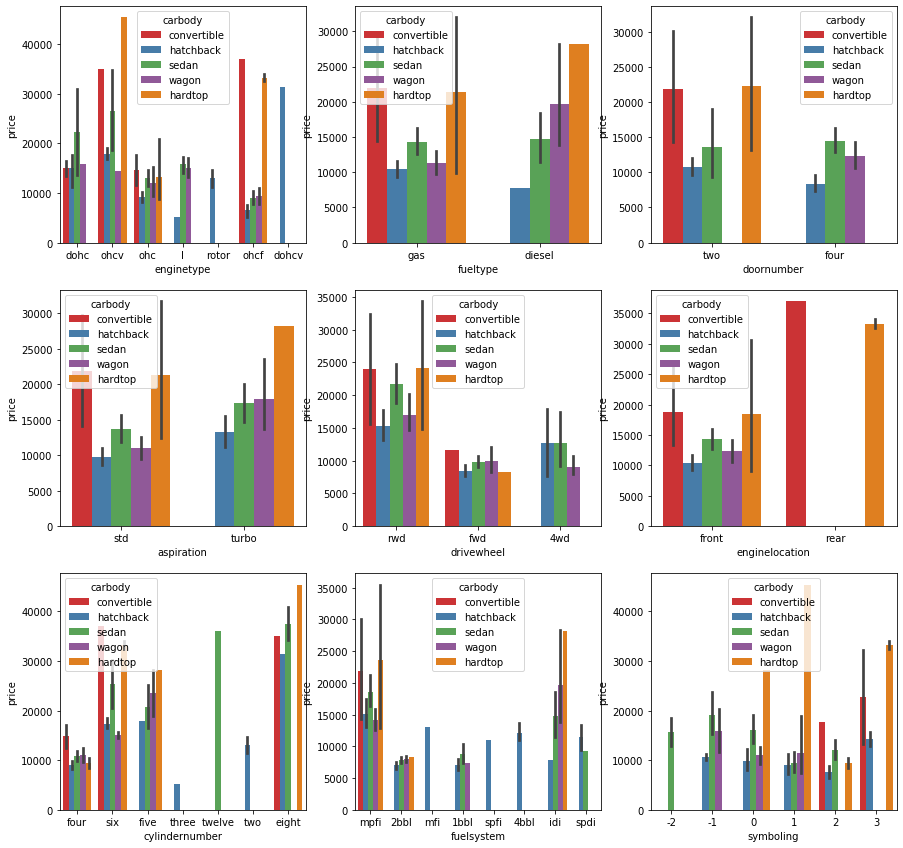

In [21]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.barplot(x='enginetype',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(432)
sns.barplot(x='fueltype',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(433)
sns.barplot(x='doornumber',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(434)
sns.barplot(x='aspiration',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(435)
sns.barplot(x='drivewheel',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(436)
sns.barplot(x='enginelocation',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(437)
sns.barplot(x='cylindernumber',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(438)
sns.barplot(x='fuelsystem',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.subplot(439)
sns.barplot(x='symboling',y="price",hue='carbody',data=CarPrice,palette="Set1")
plt.show()

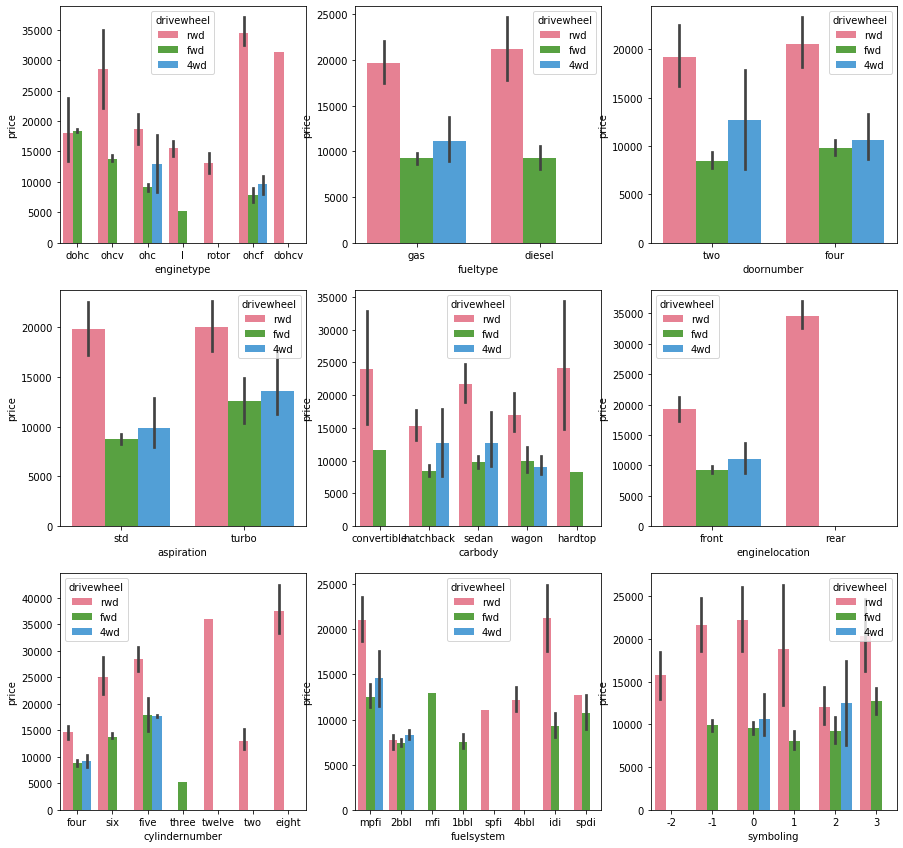

In [22]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.barplot(x='enginetype',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(432)
sns.barplot(x='fueltype',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(433)
sns.barplot(x='doornumber',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(434)
sns.barplot(x='aspiration',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(435)
sns.barplot(x='carbody',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(436)
sns.barplot(x='enginelocation',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(437)
sns.barplot(x='cylindernumber',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(438)
sns.barplot(x='fuelsystem',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.subplot(439)
sns.barplot(x='symboling',y="price",hue='drivewheel',data=CarPrice,palette="husl")
plt.show()

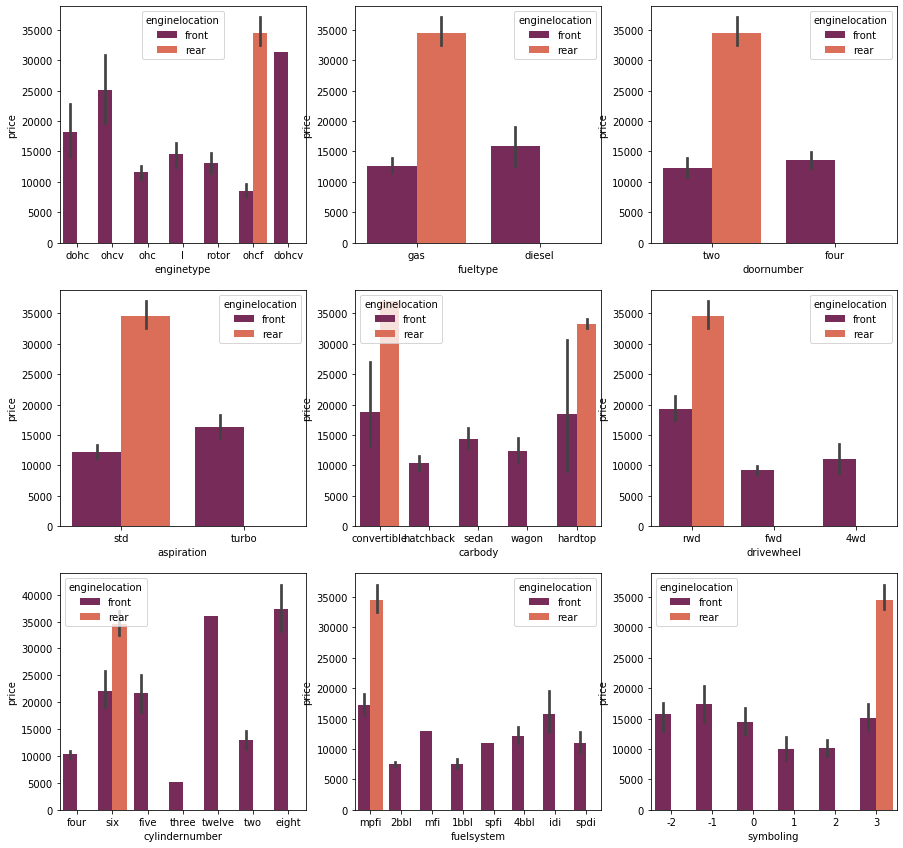

In [23]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.barplot(x='enginetype',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(432)
sns.barplot(x='fueltype',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(433)
sns.barplot(x='doornumber',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(434)
sns.barplot(x='aspiration',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(435)
sns.barplot(x='carbody',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(436)
sns.barplot(x='drivewheel',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(437)
sns.barplot(x='cylindernumber',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(438)
sns.barplot(x='fuelsystem',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.subplot(439)
sns.barplot(x='symboling',y="price",hue='enginelocation',data=CarPrice,palette="rocket")
plt.show()

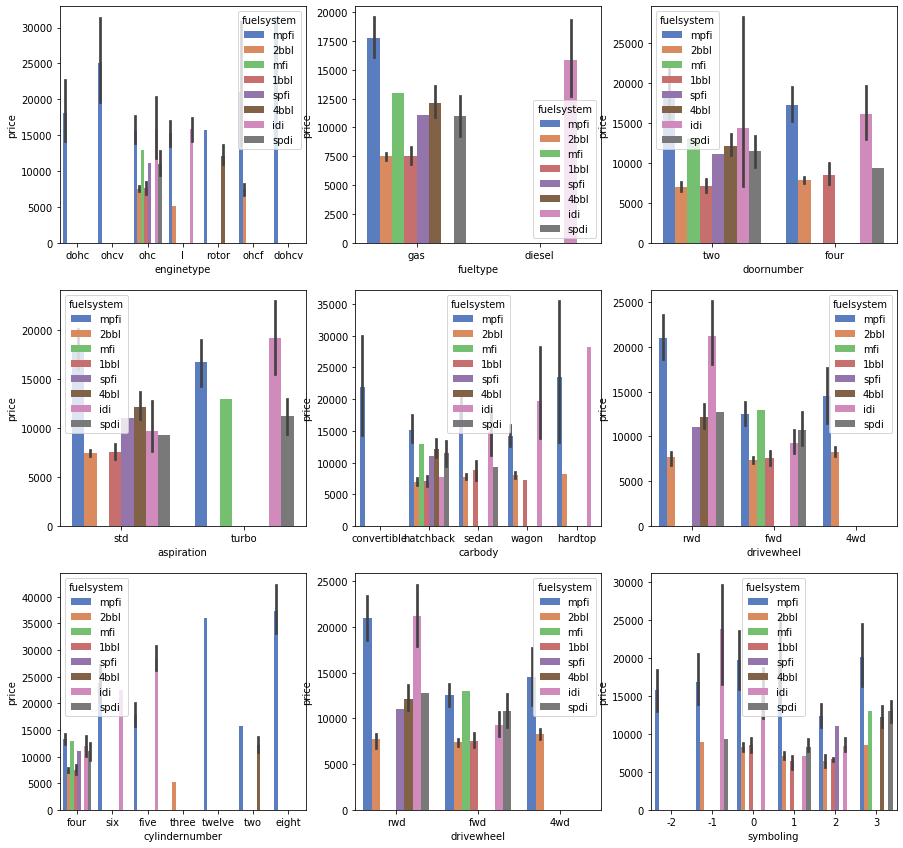

In [24]:
plt.figure(figsize=(15, 20))
plt.subplot(431)
sns.barplot(x='enginetype',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(432)
sns.barplot(x='fueltype',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(433)
sns.barplot(x='doornumber',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(434)
sns.barplot(x='aspiration',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(435)
sns.barplot(x='carbody',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(436)
sns.barplot(x='drivewheel',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(437)
sns.barplot(x='cylindernumber',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(438)
sns.barplot(x='drivewheel',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.subplot(439)
sns.barplot(x='symboling',y="price",hue='fuelsystem',data=CarPrice,palette="muted")
plt.show()

### Summary:
Based on Uivariate and Bivariate Analysis lets exclude the below variables from the data frame and create a new data frame with other variables 
'car_ID' - Exclude Car Id from data frame. It is just Unique id of each observation
'CarName' - We are considering only company name as the independent variable for model building.Already created new variable called Car Company from CarName Variable.We can exclude this
'doornumber' - Door numbers 2 and 4 have similar price Range.

### Quickly check correlations among columns by visualizing the correlation matrix as a heatmap
- Looking at pairwise correlations between the independent variables can sometimes be useful to detect multicollinearity

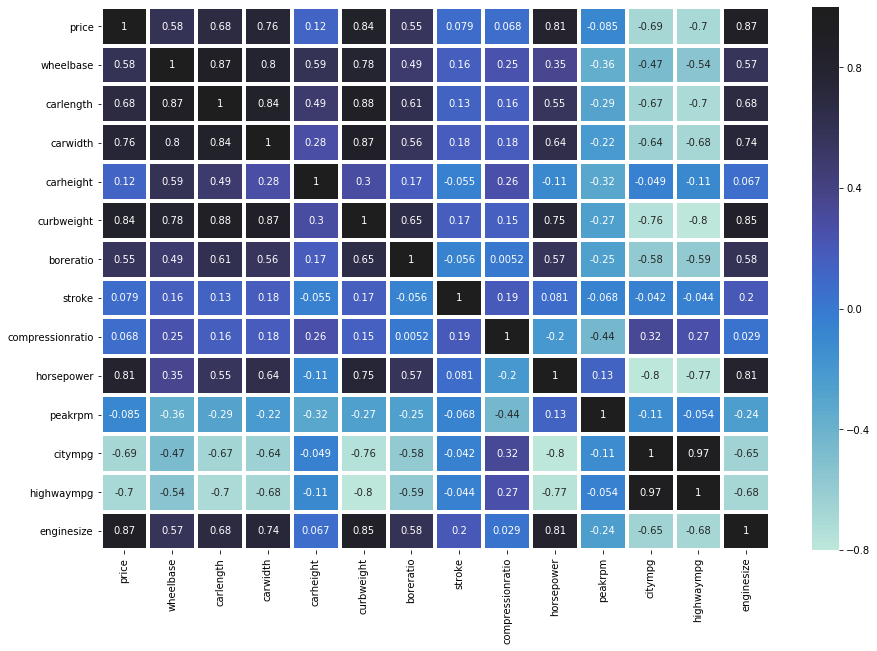

In [25]:
plt.figure(figsize=(15, 10))
FindCorrelation= ['price','wheelbase', 'carlength', 'carwidth','carheight', 'curbweight','boreratio', 'stroke',
                  'compressionratio','horsepower','peakrpm','citympg','highwaympg','enginesize']
corr = CarPrice[FindCorrelation].corr()
sns.heatmap(corr, annot=True, center=1,linewidths=3)

### Summary
* Price is much correlated with enginesize,horsepower,curbweight. The correlation is positive.These three variables are very much correlated each other. We can remove 2 of those variables
* peakrpm,citympg and highwaympg decreases as the price increases. The correlation in negative. Lets remove the negatively correlated value with price

After Uivariate and Bivariate Analysis excluded few variables from the data frame and created a data frame with other variables:
'price','CarCompany','wheelbase', 'carlength', 'carwidth','carheight','curbweight','boreratio','stroke',
                  'compressionratio','enginesize','fueltype','aspiration','doornumber','carbody','drivewheel',
                           'enginelocation','enginetype','cylindernumber','fuelsystem'

### Visualising the relasionship between Target variable(Numeric) vs Other Numeric variables

<Figure size 1080x1440 with 0 Axes>

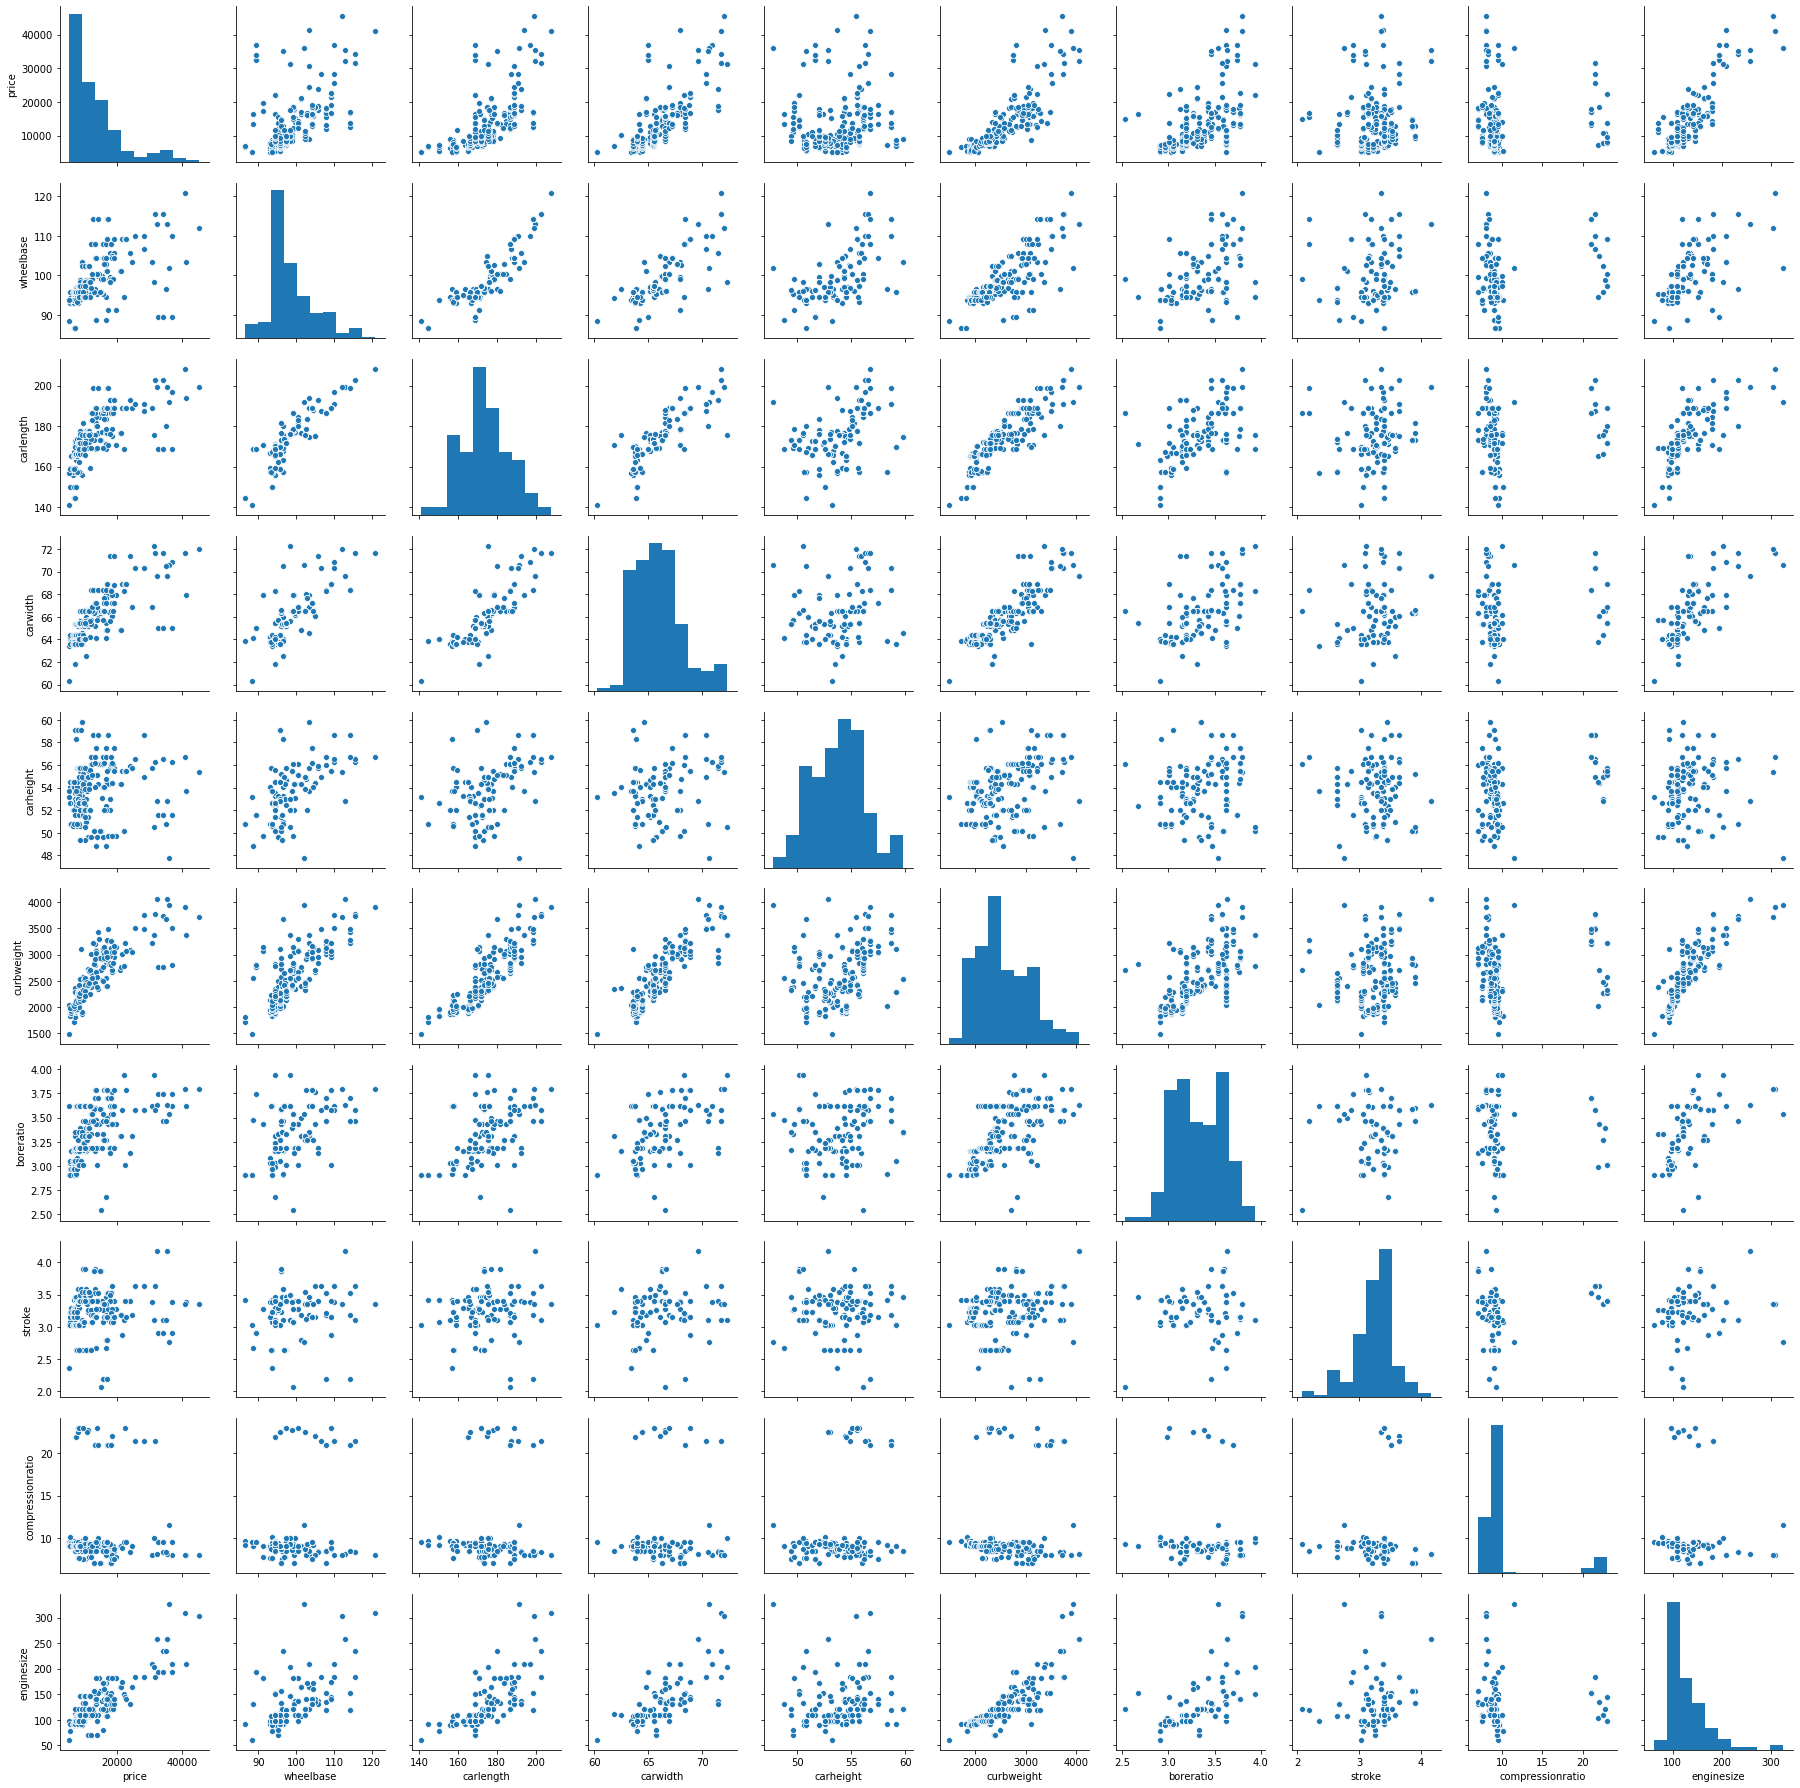

In [26]:
# After Analysis Creating new data frame with 
CarPrice_Model_df= CarPrice[['price','CarCompany','wheelbase', 'carlength', 'carwidth','carheight','curbweight','boreratio','stroke',
                  'compressionratio','enginesize','fueltype','aspiration','doornumber','carbody','drivewheel',
                           'enginelocation','enginetype','cylindernumber','fuelsystem']]
plt.figure(figsize=(15, 20))
sns.pairplot(CarPrice_Model_df)
plt.show()

### Visualizing Numerical variable Vs Price

<Figure size 1080x1440 with 0 Axes>

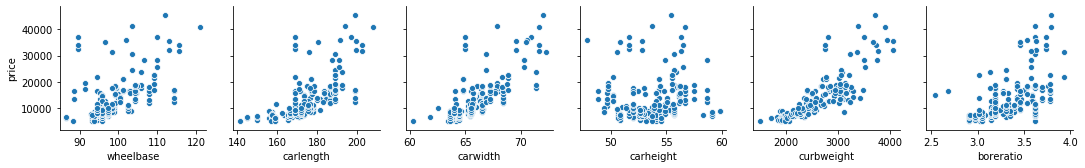

In [27]:
plt.figure(figsize=(15, 20))
sns.pairplot(CarPrice, x_vars=['wheelbase', 'carlength', 'carwidth','carheight', 'curbweight','boreratio'], y_vars='price', kind='scatter')
plt.show()

<Figure size 1080x1440 with 0 Axes>

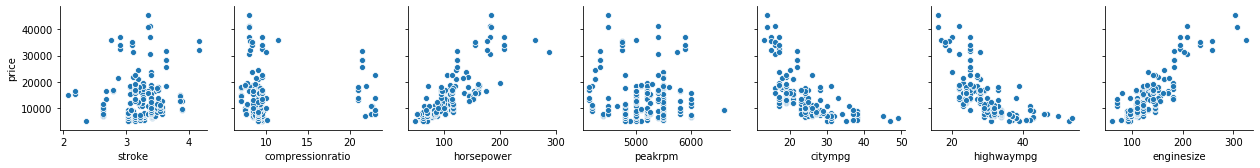

In [28]:
plt.figure(figsize=(15, 20))
sns.pairplot(CarPrice, x_vars=['stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','enginesize'], y_vars='price', kind='scatter')
plt.show()

### Summary
* Dependent Variable Price having significantly high correlation with engine size, horse power, curbweight, carwidth, carlength
* Dependent Variable Price having significantly negatie correlation with highwaympg, citympg, peakrpm

### Data Preparation
#### Preparing the data for multiple linear regression Modelling
* Converting non numerical variables(Categorical) to numerical dummy variable using encoding
##### Create Dummy Variables
The key idea behind creating dummy variables is thatfor a categorical
variable with ‘K’ levels, you create ‘K-1’ new columns each indicating whether that level exists or not using
a zero or one.

In [29]:
CarPrice_Model_df.head(5)

,price,CarCompany,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,enginesize,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,13495.0,alfa-romero,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,130,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,16500.0,alfa-romero,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,130,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,16500.0,alfa-romero,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,152,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,13950.0,audi,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,109,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,17450.0,audi,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,136,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [30]:
# Create a set of dummy variables from the below variables
Type = pd.get_dummies(CarPrice_Model_df['fueltype'])
CarCompanyName = pd.get_dummies(CarPrice_Model_df['CarCompany'])
aspirationType = pd.get_dummies(CarPrice_Model_df['aspiration'])
doornumberType = pd.get_dummies(CarPrice_Model_df['doornumber'])
carbodyType = pd.get_dummies(CarPrice_Model_df['carbody'])
drivewheelType = pd.get_dummies(CarPrice_Model_df['drivewheel'])
enginelocationType = pd.get_dummies(CarPrice_Model_df['enginelocation'])
enginetypeType = pd.get_dummies(CarPrice_Model_df['enginetype'])
cylindernumberType = pd.get_dummies(CarPrice_Model_df['cylindernumber'])
fuelsystemType = pd.get_dummies(CarPrice_Model_df['fuelsystem'])

In [31]:
# To get K-1 dummies out of K categorical Variables
Type = pd.get_dummies(CarPrice_Model_df['fueltype'], drop_first = True)
CarCompanyName = pd.get_dummies(CarPrice_Model_df['CarCompany'], drop_first = True)
aspirationType = pd.get_dummies(CarPrice_Model_df['aspiration'], drop_first = True)
doornumberType = pd.get_dummies(CarPrice_Model_df['doornumber'], drop_first = True)
carbodyType = pd.get_dummies(CarPrice_Model_df['carbody'], drop_first = True)
drivewheelType = pd.get_dummies(CarPrice_Model_df['drivewheel'], drop_first = True)
enginelocationType = pd.get_dummies(CarPrice_Model_df['enginelocation'], drop_first = True)
enginetypeType = pd.get_dummies(CarPrice_Model_df['enginetype'], drop_first = True)
cylindernumberType = pd.get_dummies(CarPrice_Model_df['cylindernumber'], drop_first = True)
fuelsystemType = pd.get_dummies(CarPrice_Model_df['fuelsystem'], drop_first = True)

In [32]:
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (Type)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (CarCompanyName)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (aspirationType)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (doornumberType)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (carbodyType)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (drivewheelType)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (enginelocationType)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (enginetypeType)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (cylindernumberType)], axis = 1)
CarPrice_Model_df = pd.concat([CarPrice_Model_df, (fuelsystemType)], axis = 1)

In [33]:
CarPrice_Model_df.head()

,price,CarCompany,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,13495.0,alfa-romero,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,16500.0,alfa-romero,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,16500.0,alfa-romero,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,13950.0,audi,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,17450.0,audi,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# To get K-1 dummies out of K categorical levels by removing the first level
CarPrice_Model_df.drop(['fueltype','aspiration','CarCompany','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], axis = 1, inplace = True)

In [35]:
CarPrice_Model_df.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,enginesize,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,13495.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,130,...,0,0,0,0,0,0,0,1,0,0
1,16500.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,130,...,0,0,0,0,0,0,0,1,0,0
2,16500.0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,152,...,0,0,0,0,0,0,0,1,0,0
3,13950.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,109,...,0,0,0,0,0,0,0,1,0,0
4,17450.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,136,...,0,0,0,0,0,0,0,1,0,0


In [36]:
CarPrice_Model_df.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'boreratio', 'stroke', 'compressionratio', 'enginesize',
       'gas', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [37]:
CarPrice_Model_df.shape

(205, 60)

### Splitting Data - Train sets and Test sets

In [38]:
# Split the data around 30%-70% between testing and training stages.
np.random.seed(0)
train_df,test_df=train_test_split(CarPrice_Model_df,train_size=0.7,test_size=0.3,random_state=100) # Splitting

In [39]:
#Post Splitting checking rows and column count of the train and test set
print(train_df.shape)
print(test_df.shape)

(143, 60)
(62, 60)


### MinMaxScaler
Transforms the features by scaling each feature to a given range.Between zero and one.

In [40]:
# MinMaxScaler
scaler = MinMaxScaler()
# Creating Scalar variable to Scale the feature
ScalerVariables = ['price', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'boreratio', 'stroke', 'compressionratio',
       'enginesize']
train_df[ScalerVariables] = scaler.fit_transform(train_df[ScalerVariables])
# Post Scaling cheking the dataframe
train_df.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,enginesize,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.068818,0.244828,0.426016,0.291667,0.265487,0.272692,0.230159,0.525253,0.15000,0.139623,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.452033,0.666667,0.212389,0.500388,1.000000,0.464646,0.15625,0.339623,...,0,0,0,0,0,0,0,1,0,0
166,0.122110,0.272414,0.448780,0.308333,0.424779,0.314973,0.444444,0.449495,0.15000,0.139623,...,0,0,0,0,0,0,0,1,0,0
1,0.314446,0.068966,0.450407,0.316667,0.088496,0.411171,0.626984,0.247475,0.12500,0.260377,...,0,0,0,0,0,0,0,1,0,0
199,0.382131,0.610345,0.775610,0.575000,0.858407,0.647401,0.746032,0.484848,0.03125,0.260377,...,0,0,0,0,0,0,0,1,0,0


In [41]:
train_df.describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,enginesize,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.219310,0.411141,0.525476,0.461655,0.509004,0.407878,0.497946,0.535389,0.190787,0.241351,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.215682,0.205581,0.204848,0.184517,0.215378,0.211269,0.207140,0.157843,0.237181,0.154619,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.067298,0.272414,0.399187,0.304167,0.353982,0.245539,0.305556,0.464646,0.100000,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.140343,0.341379,0.502439,0.425000,0.522124,0.355702,0.500000,0.545455,0.125000,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.313479,0.503448,0.669919,0.550000,0.668142,0.559542,0.682540,0.611111,0.150000,0.301887,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


### Dividing into X_train and Y_train sets for the model building
* For Y_train poping out the price variable from the train_df dataframe
* For X_train keeping as it is 

In [42]:
# Pop out price to create Y_train
y_train = train_df.pop('price')
X_train = train_df

In [43]:
# Checking y_train - head() returns the first 5 rows
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [44]:
# Checking X_train - head() returns the first 5 rows
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,enginesize,gas,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.230159,0.525253,0.15000,0.139623,1,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,1.000000,0.464646,0.15625,0.339623,1,...,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.444444,0.449495,0.15000,0.139623,1,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.626984,0.247475,0.12500,0.260377,1,...,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.746032,0.484848,0.03125,0.260377,1,...,0,0,0,0,0,0,0,1,0,0


### RFE - Recursive Feature Elimination
* RFE technique works by recursively removing attributes and building a model on those attributes that persist. 
* It uses the accuracy metric to rank the feature according to their importance. 
* This process takes the model to be used and the number of required features as input. 
* This then provides the ranking of all the variables, 
    * 1 signifying most important
    * It also gives its support:
        * True being relevant feature
        * False being irrelevant feature

### Performing Linear Regression

In [45]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
# Fit the model on the data set we have
lm.fit(X_train, y_train)
# Passing lm to RFE
#RFE needs two input - Fitted model and number of variables to choose.
# Based on Previous understanding of data lets take 15 Variables
rfe = RFE(lm, 15)
# Fit RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
# Support - > Particuar Feature selected or not
# Ranking -> For all features Ranking is 1 (15 Top features) and for the rest it is ranked interms of importance
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 15),
 ('carlength', False, 3),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 6),
 ('enginesize', True, 1),
 ('gas', False, 5),
 ('audi', False, 17),
 ('bmw', True, 1),
 ('buick', False, 16),
 ('chevrolet', False, 21),
 ('dodge', False, 39),
 ('honda', False, 40),
 ('isuzu', False, 11),
 ('jaguar', False, 31),
 ('mazda', False, 22),
 ('mercury', False, 41),
 ('mitsubishi', False, 10),
 ('nissan', False, 13),
 ('peugeot', True, 1),
 ('plymouth', False, 38),
 ('porsche', True, 1),
 ('renault', False, 29),
 ('saab', False, 4),
 ('subaru', False, 36),
 ('toyota', False, 24),
 ('volkswagen', False, 20),
 ('volvo', False, 7),
 ('turbo', False, 30),
 ('two', False, 42),
 ('hardtop', False, 26),
 ('hatchback', False, 25),
 ('sedan', False, 27),
 ('wagon', False, 28),
 ('fwd', False, 43),
 ('rwd', False, 37),
 ('rear', True, 1),
 ('dohcv', False, 18),
 ('l', False, 2),

In [47]:
# Checking RFE Selected Columns
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'boreratio', 'stroke', 'enginesize', 'bmw',
       'peugeot', 'porsche', 'rear', 'rotor', 'five', 'four', 'three',
       'twelve', 'two'],
      dtype='object')

In [48]:
# Checking column which RFE did not Select - RFE Support False
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'gas',
       'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'turbo', 'two',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'six', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

### Coefficient Calculation

In [49]:
# Print the intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2377860847734.4585
[ 2.10620995e-01 -1.96090104e-01  3.19538467e-01 -1.75967801e-01
  3.32691705e-01 -6.50467738e-01 -2.18274836e-01 -3.25611946e-01
  1.78436268e+00 -2.37786085e+12  1.23517583e-01  4.13806955e-01
  1.06152408e-01  2.59978023e-02 -2.44141461e-02 -1.12883976e-02
  7.13548981e-02 -5.48044446e-02  6.44664573e-02 -8.60630553e+11
 -5.23178822e-02  9.27363471e-02  1.97667862e+11 -2.45076302e-02
  3.21989397e-01  6.64717683e-02  2.52117078e-01 -5.15925183e+11
  5.23864774e-02  8.35967588e-02  1.94553083e-01  3.82425941e-02
 -5.23284765e-03 -6.75892296e-02 -8.48792714e-02 -5.54781487e-02
 -4.14662843e-02 -8.74835170e-04  2.18854115e-02 -5.15925183e+11
  1.63459610e-01 -1.97667862e+11 -5.07313205e-02  5.15925183e+11
 -4.07237910e-02 -2.22873754e+11  3.15919332e-01  4.89424313e-01
  1.16071930e-01  1.97667862e+11 -4.04814725e-01  2.22873754e+11
 -2.49021353e-02 -7.41041756e-02 -2.37786085e+12  0.00000000e+00
 -6.06220799e-02 -6.32829310e-02  0.00000000e+00]


### Building model using statsmodel, for the detailed statistics

In [50]:
#Creating function to build a model to avoid repeated process
# Below function adds contant to the variable,fit the model and it will print the summary of the model
def lrModel(X_train,y_train):
    X_train=sm.add_constant(X_train) #Adding Constant to the variable
    lm=sm.OLS(y_train,X_train).fit() #Fit the model
    # Summary of the Model
    print(lm.summary())
    return X_train

In [51]:
#Creating function to calculate VIF - To avoid repeated process
# Variance Inflation Factor - Measure of the amount of multicollinearity in a set of multiple regression variables
def VIFCalculation(X_train):
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values, k) for k in range(X_train.shape[1])]
    vif['VIF']=round(vif['VIF'], 1)
    vif=vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [52]:
# Creating X_test dataframe with RFE selected variables
# Making data set with RFE Selected 15 Columns
X_train_rfe=X_train[col]

### Linear Regression - Model 1:

In [53]:
# Building the first model
X_train_new=lrModel(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           9.80e-70
Time:                        23:51:40   Log-Likelihood:                 217.73
No. Observations:                 143   AIC:                            -403.5
Df Residuals:                     127   BIC:                            -356.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2823      0.039     -7.320      0.0

### Summary:
- Adjusted R-Squared(0.933) Very Similar with R-Squared (0.940)
- Cheking coefficient:
    - Expect Cylinder Number two variable. Everything else is significant (P-Value is 0.000)
- F-Statistics is high which is good sign

### Next Step:
- To Reconfirm calculating VIF - Variance Inflation Factor - Measure of the amount of multicollinearity in a set of multiple regression variables

In [54]:
#Calculating the Variance Inflation Factor
VIFCalculation(X_train_new)

,Features,VIF
16,two,inf
10,rotor,inf
0,const,67.8
5,enginesize,29.2
12,four,13.3
2,curbweight,12.1
1,carwidth,6.2
3,boreratio,5.7
14,twelve,3.1
11,five,2.9


### Summary:
- For Cylinder number two the VLF Value(infinity) and P-Value(0.481) both are too high. We can remove the variable since both are high
- Also we can remove the Rotor which also have infinite VLF

After Analysing the first model . Removing Cylinder number two and Rotor

In [55]:
# Dropping Variables
X_train_new=X_train_new.drop(['two','rotor'], axis = 1)

### Linear Regression - Model 2:

In [56]:
# Building the Second model
X_train_new=lrModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           2.28e-62
Time:                        23:51:40   Log-Likelihood:                 193.18
No. Observations:                 143   AIC:                            -358.4
Df Residuals:                     129   BIC:                            -316.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1292      0.037     -3.455      0.0

### Summary:
After removing high P-Value and high VIF Variable,

- Adjusted R-Squared(0.915) Very Similar with R-Squared (0.906) - Sighlightly reduced R-Squared and Adjusted R-Squared Value compared to previous Model.
- Cheking coefficient and P-Values:
    - Insignificant Variables : P-Value is too high for five','twelve','boreratio','porsche','stroke
    - Except above one everthing else is significant
- F-Statistics value decreased compared to previous model

### Next Step:
- To Reconfirm calculating VIF - Variance Inflation Factor - Measure of the amount of multicollinearity in a set of multiple regression variables

In [57]:
#Calculating the Variance Inflation Factor
VIFCalculation(X_train_new)

,Features,VIF
0,const,45.9
2,curbweight,11.1
5,enginesize,8.3
1,carwidth,6.1
11,four,3.5
3,boreratio,2.9
8,porsche,1.9
9,rear,1.8
7,peugeot,1.7
13,twelve,1.7


### Summary:
- P-Value is too high but the VIF Value is low for variable 'five','twelve','boreratio','porsche','stroke','rear'
- In this case, lets go-ahead and remove the variable which has high value first even the VIF is low

In [58]:
# Dropping Insignificant Variables
X_train_new.drop(['five','twelve','boreratio','porsche','stroke','rear'],axis=1,inplace=True)

### Linear Regression - Model 3:

In [59]:
X_train_new=lrModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           3.71e-58
Time:                        23:51:40   Log-Likelihood:                 166.63
No. Observations:                 143   AIC:                            -317.3
Df Residuals:                     135   BIC:                            -293.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1126      0.037     -3.037      0.0

### Summary:
After removing Insignificant Variables,

- Adjusted R-Squared(0.877) Very Similar with R-Squared (0.870) - Sighlightly reduced R-Squared and Adjusted R-Squared Value compared to previous Model.
- Cheking coefficient and P-Values:
    - Insignificant Variables : P-Value is too high for peugeot','curbweight','four','three'
    - Except above one everthing else is significant
- F-Statistics value increased compared to previous model which is good sign

### Next Step:
- To Reconfirm calculating VIF - Variance Inflation Factor - Measure of the amount of multicollinearity in a set of multiple regression variables

In [60]:
#Calculating the Variance Inflation Factor
VIFCalculation(X_train_new)

,Features,VIF
0,const,32.6
2,curbweight,8.9
3,enginesize,4.9
1,carwidth,4.5
6,four,2.3
5,peugeot,1.6
7,three,1.2
4,bmw,1.1


Curbweight P-Vlue and VIF both are high . Lets drop the variable

In [61]:
X_train_new=X_train_new.drop(['curbweight'],axis=1)

### Linear Regression - Model 4:

In [62]:
X_train_new=lrModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           6.66e-57
Time:                        23:51:41   Log-Likelihood:                 160.85
No. Observations:                 143   AIC:                            -307.7
Df Residuals:                     136   BIC:                            -287.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0887      0.038     -2.348      0.0

### Summary:
After removing Insignificant Variable,

- Adjusted R-Squared(0.866) Very Similar with R-Squared (0.860) - Sighlightly reduced R-Squared and Adjusted R-Squared Value compared to previous Model.
- Cheking coefficient and P-Values:
    - Insignificant Variables :Still P-Value is too high for 'peugeot','three'
    - Except above one everthing else is significant
- F-Statistics value increased compared to previous model which is good sign

### Next Step:
- To Reconfirm calculating VIF - Variance Inflation Factor - Measure of the amount of multicollinearity in a set of multiple regression variables

In [63]:
#Calculating the Variance Inflation Factor
VIFCalculation(X_train_new)

,Features,VIF
0,const,31.4
1,carwidth,3.2
2,enginesize,2.8
5,four,2.2
4,peugeot,1.3
6,three,1.2
3,bmw,1.1


In [64]:
X_train_new=X_train_new.drop(['peugeot','three'],axis=1)

### Linear Regression - Model 5:

In [65]:
X_train_new=lrModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           6.20e-59
Time:                        23:51:41   Log-Likelihood:                 160.09
No. Observations:                 143   AIC:                            -310.2
Df Residuals:                     138   BIC:                            -295.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0639      0.032     -2.022      0.0

In [66]:
#Calculating the Variance Inflation Factor
VIFCalculation(X_train_new)

,Features,VIF
0,const,22.1
2,enginesize,2.8
1,carwidth,2.5
4,four,1.7
3,bmw,1.1


### Summary:
- The R-squared and Adj. R-squared values are very much similar which is 0.865 and 0.861 respectively which intimates that none of the parameters in the model are redundant.
- Cheking coefficient and P-Values:
    - All the variables are statistically significant;The P-Values for all the variables are less than 0.05 which is 0.000 which is very good sign
    - There is no insignificant variables in the Final Model
- VIF - The values of all the significant variable is less which is less than 2. It indicates there is no multicollinearity
- We can consider this as final model

Note: We cannot use p value or vif for constant (intercept) value.
Because we are adding constant term specially and if it is not important then model will automatically evaluates it to zero

### Residual Analysis of the train data

##### Making Predictions

In [67]:
lm=sm.OLS(y_train,X_train_new).fit()
# Finind Predicted value of Y_train
y_train_price=lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

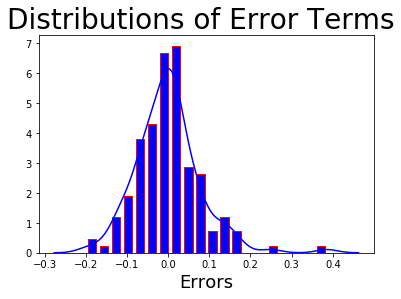

In [68]:
# Plot the histogram of the error terms
fig=plt.figure()
sns.distplot((y_train - y_train_price), bins = 20,color="b",hist_kws={"rwidth":0.7,'edgecolor':'red', 'alpha':1.0})
fig.suptitle('Distributions of Error Terms', fontsize = 28)     
plt.xlabel('Errors', fontsize = 18)   

### Summary:
    The distribution of error term is centered around zero and it is approximately normal

### Making Predictions Using the Final Model
* Make Predictions on test set and evaluating models on the test set
* The way use to evaluate model using R-Squared. In Final Model R-Squared is 86.5% in Training Set
* R-Squared in Traning Set and Test Set should be comparable

In [69]:
# Numerical Variable remains the same for test data set
NumberVariables = ['price', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'boreratio', 'stroke', 'compressionratio',
       'enginesize']
#Not fiiting anything on the test test.Only Transforming test set
test_df[NumberVariables] = scaler.transform(test_df[NumberVariables])
# Verifying all the variables are actually scaled appropriately by looking at test_df.describe()
test_df.describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,enginesize,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.239439,0.437764,0.559481,0.480376,0.559663,0.428470,0.556580,0.544314,0.209375,0.265673,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.233076,0.212861,0.189947,0.165440,0.215811,0.179488,0.228484,0.160738,0.273690,0.162820,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.007763,0.000000,0.056911,0.183333,0.141593,0.128394,-0.111111,-0.060606,0.000000,0.067925,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.092342,0.313793,0.459350,0.358333,0.384956,0.305275,0.404762,0.484848,0.093750,0.177358,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.158991,0.387931,0.547967,0.441667,0.588496,0.406129,0.563492,0.585859,0.125000,0.226415,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.317243,0.570690,0.719919,0.516667,0.699115,0.564876,0.746032,0.641414,0.150000,0.316038,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.112855,1.182759,1.089431,0.975000,1.061947,0.935609,0.888889,0.863636,1.000000,0.932075,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Summary:
The max value of test set is not 1. But Max value of the training set is 1.

In [70]:
# Create y_test - Take out price column from test_df
y_test = test_df.pop('price')
# X_test
X_test = test_df

In [71]:
X_train_new.columns

Index(['const', 'carwidth', 'enginesize', 'bmw', 'four'], dtype='object')

In [72]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [73]:
# Create X_test_new Dataframe
X_test_new = X_test[X_train_new.columns]

# Add Constant to make prediction
X_test_new = sm.add_constant(X_test_new)

In [74]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

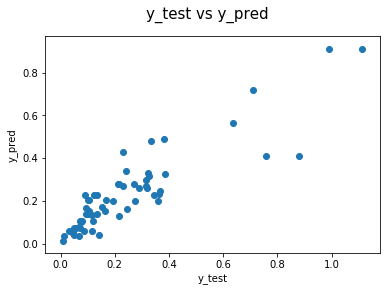

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)                          # Y-label

### Done with model building and residual analysis, and have made predictions on the test set
#### calculate the R-squared score on the test set.

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7955688169527878

### Summary
- R-squared score on the test set is 0.7955688169527878. The R-Squared value is about 79.5% which means our model is able to explain approximately 80% of the variance which is good.

In [77]:
from sklearn.metrics import mean_squared_error
MeanSquaredError = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,MeanSquaredError)

Mean_Squared_Error : 0.010926485889865032


### Summary
* The model is getting a mean square error of 0.01 which indicates the model is not able to match 1% of the values only, which is pretty much good.

### Comparing the actual values with the predicted values

In [78]:
df = pd.DataFrame({'Actual Value': y_test.values.flatten(), 'Predicted Value': y_pred.values.flatten()})
df

,Actual Value,Predicted Value
0,0.072382,0.075266
1,0.093295,0.138535
2,0.102964,0.203244
3,0.115479,0.061847
4,0.068652,0.079109
5,0.169268,0.203244
6,0.367489,0.245904
7,0.314529,0.296712
8,0.346741,0.230584
9,0.333757,0.478678


### visualizing comparison result - Actual Vs Predicted

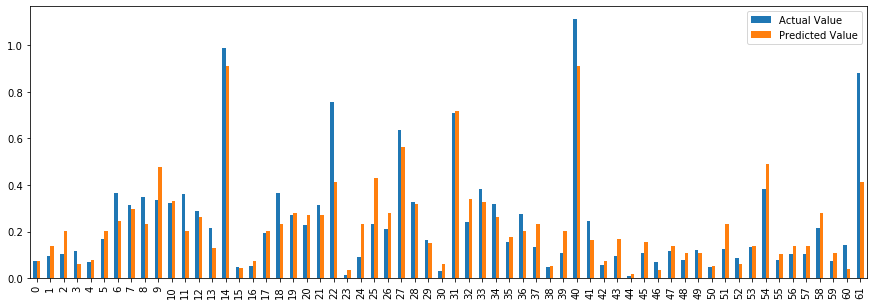

Text(0, 0.5, 'Price of the Car')

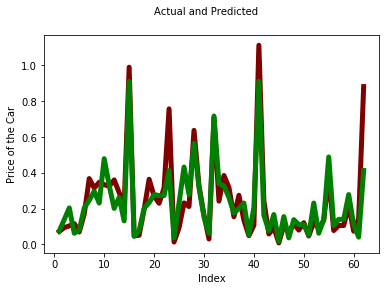

In [79]:
Plot_df = df.head(62)   
Plot_df.plot(kind='bar',figsize=(15,5))                   # Plotting bar graph
plt.show()
Act_Pred_vars= [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(Act_Pred_vars,y_test,color="maroon",linewidth=5)     
plt.plot(Act_Pred_vars,y_pred,color="green",linewidth=5)  
fig.suptitle('Actual and Predicted', fontsize=10)               
plt.xlabel('Index', fontsize=10)                            
plt.ylabel('Price of the Car', fontsize=10)  

the predicted percentages are close to the actual ones.

In [80]:
print(lm.params)
print('R2: ', lm.rsquared)

const        -0.063930
carwidth      0.402556
enginesize    0.635240
bmw           0.204952
four         -0.087038
dtype: float64
R2:  0.8649274282943394


### Conslusion
- The R-squared and Adj. R-squared values are very much similar which is 0.865 and 0.861 respectively which intimates that none of the parameters in the model are redundant.
- Cheking coefficient and P-Values:
    - All the variables are statistically significant;The P-Values for all the variables are less than 0.05 which is 0.000 which is very good sign
    - There is no insignificant variables in the Final Model
- AIC and BIC:
    - AIC Value is very low in the Final model which is -310.2. More lowering AIC indicates a model is held to be closer to the accuracy
    - BIC Value is very low in the Final model which is -295.4. More lowering BIC indicates a model is held to be closer to the accuracy
- F-Statistics Used to assess whether the overall model fit is significant or not
- F-Statistics value increased compared to other previous model. the higher the value of F statistic value which is 220.9, the more significant a model turns out to be.
- VIF - The values of all the significant variable is less which is less than 2. It indicates there is no multicollinearity
- The distribution of error term is centered around zero and it is approximately normal.
- R-squared score on the test set is 0.7955688169527878. The R-Squared value is about 79.5% which means our model is able to explain approximately 80% of the variance which is also good.
- The model is getting a mean square error of 0.01 which indicates the model is not able to match 1% of the values only, which is pretty much good.

##### Based on the above analysis, this model looks to be stable, The variables that can influence price are:

- carwidth - Width of car   
- enginesize - Size of car
- bmw - car company Name    
- four - Number of cylinder placed in the car  

##### Overall the model-5(Final Model) is very decent